In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
import plotly.express as px

In [3]:
DB = cnt.connect(
host = '88.223.121.130',
user='user',
password='slaptazodis',
port=3306,
database='works'
)
C=DB.cursor()

In [ ]:
# SQl lentelė - InsuranceUSA7cols.
# Ar yra priklausoimybė tarp lyties, kūno masės indekso (bmi),
# rūkymo, amžiaus, vaikų kiekio ir draudimo įmokos dydžio?

In [4]:
sql=""" select * from InsuranceUSA7cols;"""
df = pd.read_sql_query(sql, con=DB)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


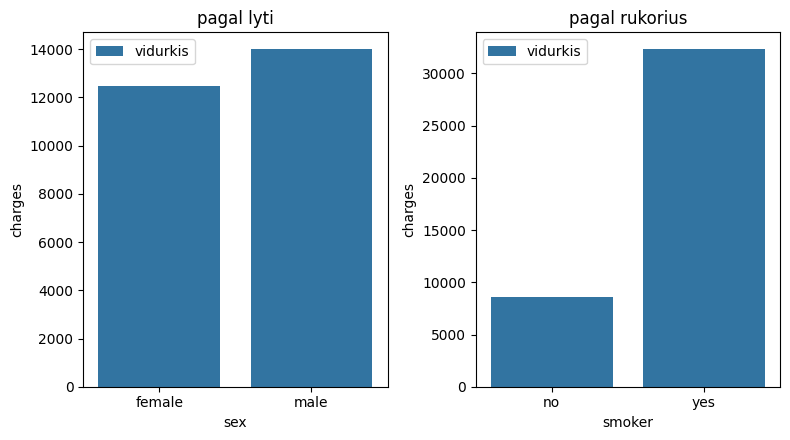

In [20]:
df_sex  = df[['sex', 'charges']].groupby('sex').mean().reset_index()
df_sex.head()

df_smoker  = df[['smoker', 'charges']].groupby('smoker').mean(numeric_only=True).reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4.5))

sns.barplot(data=df_sex, x='sex', y='charges', ax=ax1, label='vidurkis')
sns.barplot(data=df_smoker, x='smoker', y='charges', ax=ax2, label='vidurkis')

ax1.set_title('pagal lyti')
ax2.set_title('pagal rukorius')

ax1.legend(loc='best')
plt.tight_layout()
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (5,).

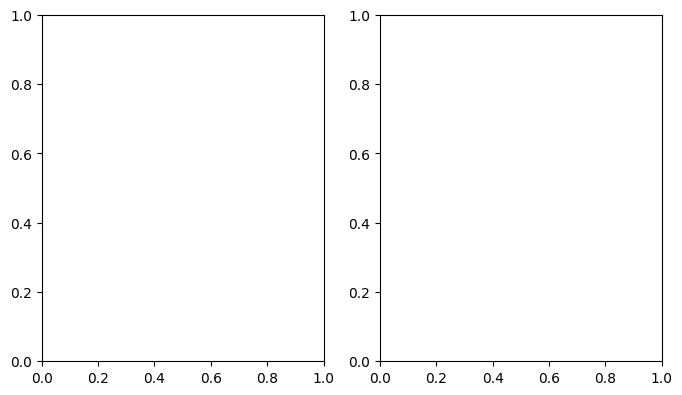

In [18]:
sql="""
select sex,children, count(*) as C
from InsuranceUSA7cols
where sex = 'male' and smoker = 'yes'
group by children;
"""
df_msy = pd.read_sql_query(sql, con=DB)

sql="""
select sex,children, count(*) as C
from InsuranceUSA7cols
where sex = 'male' and smoker = 'no'
group by children;
"""
df_msn = pd.read_sql_query(sql, con=DB)

sql="""
select sex,children, count(*) as C
from InsuranceUSA7cols
where sex = 'female' and smoker = 'yes'
group by children;
"""
df_fsy = pd.read_sql_query(sql, con=DB)

sql="""
select sex,children, count(*) as C
from InsuranceUSA7cols
where sex = 'female' and smoker = 'no'
group by children;
"""
df_fsn = pd.read_sql_query(sql, con=DB)

df_fsn.head()


fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(8,4.5))

a = np.arange(0, 6)
w = 0.2

M1 = ax1.bar(a-w*0.5, df_msy['C'], width=w, label='vyr. ruko')
M2 = ax1.bar(a+w*0.5, df_msn['C'], width=w, label='vyr. neruko')
ax1.legend()



fig.tight_layout()
plt.show()





In [22]:
sql=""" select * from InsuranceUSA7cols;"""
df = pd.read_sql_query(sql, con=DB)
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


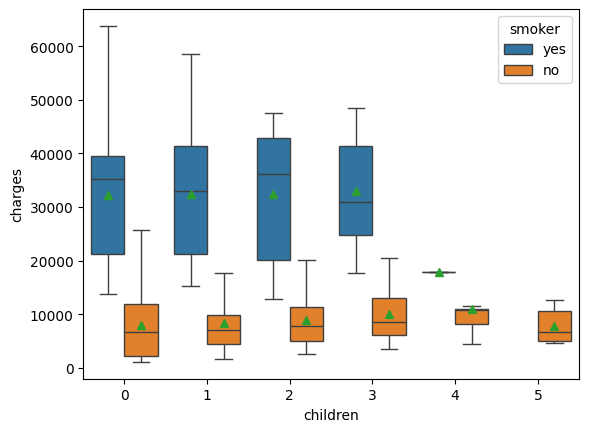

In [27]:
# sns.boxplot(data=df, x='children', y='charges', showmeans=True, showfliers=False, hue='sex')
sns.boxplot(data=df, x='children', y='charges', showmeans=True, showfliers=False, hue='smoker')
# ax = set_xlabel('vaiku kiekis')
plt.show()

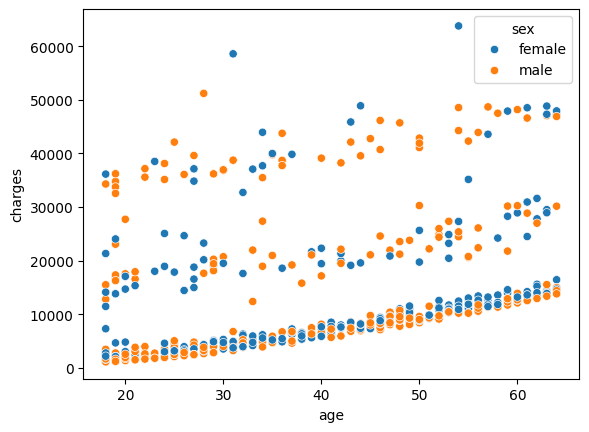

In [28]:
sns.scatterplot(data=df, x='age', y='charges', hue='sex')
plt.show()

<Axes: xlabel='sex,smoker'>

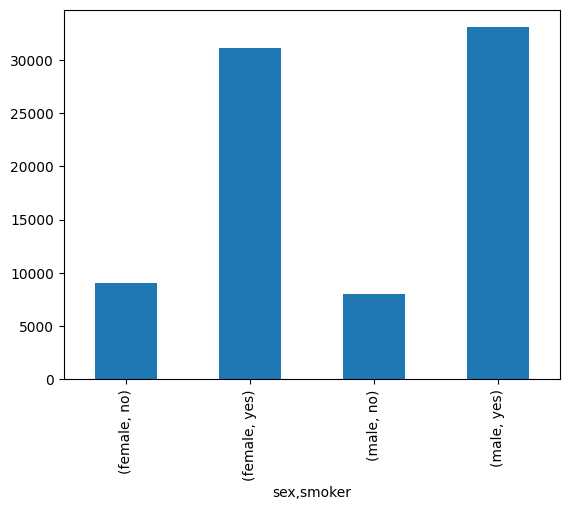

In [30]:
#  pandas groupby, unstack() ir braizymas

df.groupby(['sex', 'smoker'])['charges'].mean().plot(kind='bar')

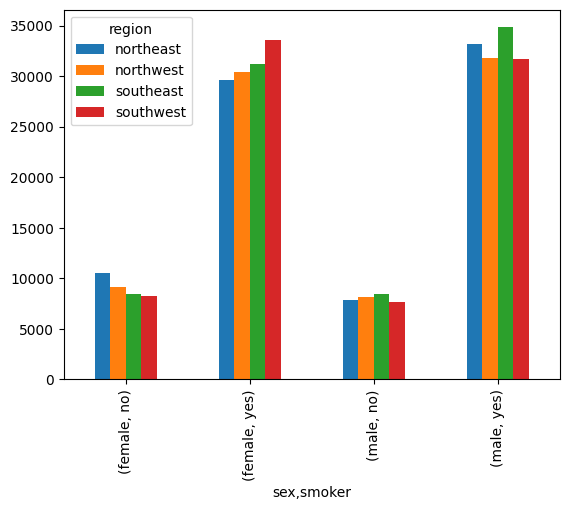

In [35]:
df.groupby(['sex', 'smoker', 'region'])['charges'].mean().unstack().plot(kind='bar')
plt.show()

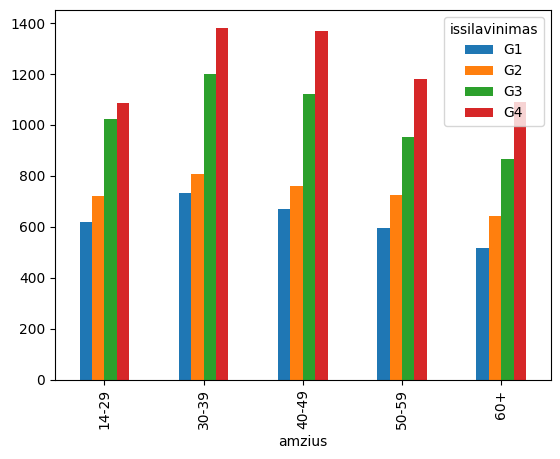

In [41]:
# dus2018.csv:
# parodykite vidutinio atlyginimo priklausomybę nuo išsilavinimo ir amžiaus grupės (bar, vienas grafikas)

dus18 = '../../DATA/DUS2018.csv'
df18 = pd.read_csv(dus18)
df = df18[['issilavinimas', 'amzius', 'bdu_spalio']]

# fig, axis = plt.subplots(figsize=(8,4.5))
#plotting code:
df.groupby(['amzius', 'issilavinimas'])['bdu_spalio'].mean().unstack().plot(kind='bar')

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
# fig.tight_layout()
plt.show()

In [42]:
# prisijungimas prie sqlite3

SDB = sqlite3.connect('Testas.db')  # jei neegzistuoja db , bus sukurta nauja db
Cs = SDB.cursor()

In [43]:
SDB = sqlite3.connect('../../DATA/sqlDATA.db')  # jei neegzistuoja db , bus sukurta nauja db
Cs = SDB.cursor()

In [ ]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql=""""""
C.execute(sql)
ans = C.fetchall()
? = list(map(list, zip(*ans)))
#? = np.transpose(ans)

In [44]:
#sql užklausa per pandas sql_query
sql="""select lytis, issilavinimas, amzius from DUS2018N;"""
df = pd.read_sql_query(sql, con=SDB)
df

,lytis,issilavinimas,amzius
0,F,G2,40-49
1,M,G2,50-59
2,M,G2,40-49
3,M,G2,50-59
4,F,G2,40-49
...,...,...,...
43159,M,G4,30-39
43160,F,G2,30-39
43161,F,G2,40-49
43162,M,G3,30-39


In [45]:
sql = '''create table T1
(
name text not null,
surname text not null,
age integer not null,
salary real not null
)
'''
Cs.execute(sql)

In [48]:
sql_template = '''insert into T1 values (?,?,?,?)'''
data = [("Ona", "Onynė", 24, 1860),("Jonas", "Jonėnas", 28, 1670),("Petras", "Petrynas", 42, 2760)]
Cs.executemany(sql_template, data)

In [49]:
SDB.commit() # commit() butinas jei norim irasyti duomenis i DB

In [2]:
SDB = sqlite3.connect('Testas.db')  # jei neegzistuoja db , bus sukurta nauja db
Cs = SDB.cursor()

#  if not exists - tikrina ar jau sukurta DB
sql = '''create table if not exists T1
(
name text not null,
surname text not null,
age integer not null,
salary real not null
)
'''
Cs.execute(sql)

sql_template = '''insert into T1 values (?,?,?,?)'''
data = [("Ona", "Onynė", 24, 1860),("Jonas", "Jonėnas", 28, 1670),("Petras", "Petrynas", 42, 2760)]
Cs.executemany(sql_template, data)

Cs.execute(sql_template, ('T1', 'F1', 10, 1024))

SDB.commit() # commit() butinas jei norim irasyti duomenis i DB

SDB.close()